### Step 1: Data Acquisition

In this task, we begin by retrieving two datasets from the National Health and Nutrition Examination Survey (NHANES), available via the teaching resources on GitHub:

- `nhanes_adult_male_bmx_2020.csv`
- `nhanes_adult_female_bmx_2020.csv`

These files contain body measurement data for adult males and females respectively, including variables such as weight, height, and various body circumferences.

To ensure reproducibility and avoid manual downloads, we directly load the datasets using their raw GitHub URLs via NumPy's `genfromtxt` function.


In [1]:
import numpy as np

# Load local files
male_raw = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=1)
female_raw = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", skip_header=1)

# Manually remove the first row if it's all nan
male = male_raw[1:] if np.isnan(male_raw[0]).all() else male_raw
female = female_raw[1:] if np.isnan(female_raw[0]).all() else female_raw

# Display first 5 rows to confirm
print("First 5 rows of male dataset:\n", male[:5])
print("\nFirst 5 rows of female dataset:\n", female[:5])



First 5 rows of male dataset:
 [[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]

First 5 rows of female dataset:
 [[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]


### Step 2: Compute and Append Body Mass Index (BMI)

In this step, we calculate the Body Mass Index (BMI) for each individual in the male and female datasets and append it as an additional (8th) column.

BMI is a widely used metric to assess body fat based on weight and height. It is computed using the formula:

$$
\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}
$$

Since the height values in the dataset are given in centimeters, we first convert them to meters. After calculating the BMI, we horizontally stack the BMI values to the original datasets using NumPy's `hstack` function.

This transformation prepares the data for further visual and statistical analysis.


In [2]:
# Calculate BMI for male: weight (kg) / (height in meters)^2
male_bmi = male[:, 0] / ((male[:, 1] / 100) ** 2)

# Calculate BMI for female
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)

# Round to 2 decimal places
male_bmi = np.round(male_bmi, 2)
female_bmi = np.round(female_bmi, 2)

# Reshape to column vectors for stacking
male_bmi = male_bmi.reshape(-1, 1)
female_bmi = female_bmi.reshape(-1, 1)

# Append BMI as the 8th column
male = np.hstack((male, male_bmi))
female = np.hstack((female, female_bmi))

# Display first 5 rows to confirm
print("First 5 rows of male dataset:\n", male[:5])
print("\nFirst 5 rows of female dataset:\n", female[:5])


First 5 rows of male dataset:
 [[ 98.8  182.3   42.    40.1   38.2  108.2  120.4   29.73]
 [ 74.3  184.2   41.1   41.    30.2   94.5   86.8   21.9 ]
 [103.7  185.3   47.    44.    32.   107.8  109.6   30.2 ]
 [ 86.   167.8   39.5   38.4   29.   106.4  108.3   30.54]
 [ 99.4  181.6   40.4   39.9   36.   120.2  107.    30.14]]

First 5 rows of female dataset:
 [[ 97.1  160.2   34.7   40.8   35.8  126.1  117.9   37.84]
 [ 91.1  152.7   33.5   33.    38.5  125.5  103.1   39.07]
 [ 73.   161.2   37.4   38.    31.8  106.2   92.    28.09]
 [ 61.7  157.4   38.    34.7   29.   101.    90.5   24.9 ]
 [ 55.4  154.6   34.6   34.    28.3   92.5   73.2   23.18]]


### Step 3: Visualizing BMI Distributions with Histograms

In this step, we visualize the Body Mass Index (BMI) distributions for both male and female participants using histograms.

To facilitate easy comparison, we display both histograms vertically aligned within a single figure using `matplotlib.pyplot.subplot`. Each subplot shows the frequency distribution of BMI values, using 20 bins.

To ensure the comparison is fair and visually consistent, we manually set identical x-axis limits for both histograms based on the overall BMI range observed in the datasets.

This visualization helps us understand the spread and shape of BMI values across genders, revealing patterns such as skewness, outliers, and central tendencies.


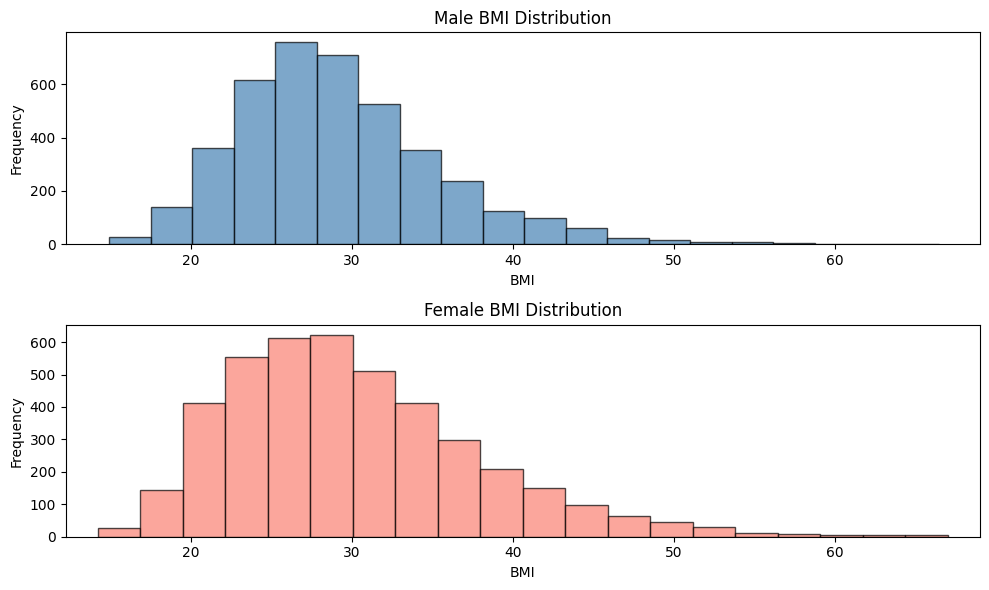

In [3]:
import matplotlib.pyplot as plt

# Extract BMI columns
male_bmi = male[:, 7]
female_bmi = female[:, 7]

# Set figure size and bins
plt.figure(figsize=(10, 6))
bins = 20

# Determine common x-axis limits
min_bmi = min(male_bmi.min(), female_bmi.min())
max_bmi = max(male_bmi.max(), female_bmi.max())
x_limits = (min_bmi - 2, max_bmi + 2)

# Top subplot: Male BMI
plt.subplot(2, 1, 1)
plt.hist(male_bmi, bins=bins, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Male BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.xlim(x_limits)

# Bottom subplot: Female BMI
plt.subplot(2, 1, 2)
plt.hist(female_bmi, bins=bins, color='salmon', edgecolor='black', alpha=0.7)
plt.title("Female BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.xlim(x_limits)

plt.tight_layout()
plt.show()


### Step 4: Box-and-Whisker Plot Comparison of BMI

In this step, we create a box-and-whisker plot to compare the BMI distributions between male and female participants in a compact and visual format.

The plot is generated using a single call to `matplotlib.pyplot.boxplot`, with two horizontally stacked boxplots (one for each gender). This allows for a clear comparison of the central tendency, spread, and presence of outliers in each group.

Boxplots summarize key descriptive statistics including:
- The median (middle line),
- The interquartile range (box),
- The full range excluding outliers (whiskers),
- Any potential outliers (dots beyond the whiskers).

This visual provides quick insights into differences in variability and central location of BMI between males and females.


/var/folders/td/k6fvhfwd3pzft8bk6bhyz16m0000gn/T/ipykernel_41352/3273053865.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_bmi, female_bmi], labels=["Male", "Female"], vert=False)


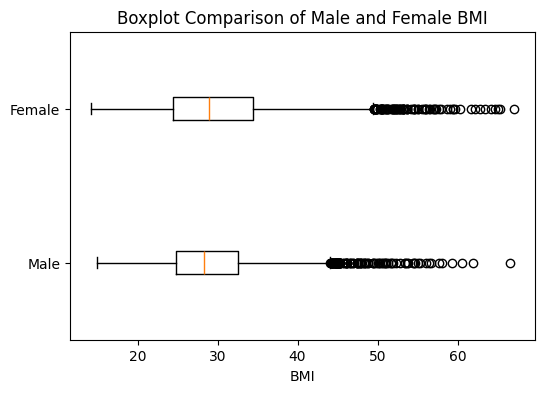

In [4]:
import matplotlib.pyplot as plt



# Create a boxplot comparing male and female BMIs
plt.figure(figsize=(6, 4))
plt.boxplot([male_bmi, female_bmi], labels=["Male", "Female"], vert=False)
plt.title("Boxplot Comparison of Male and Female BMI")
plt.xlabel("BMI")
plt.show()


### Step 5: Numerical Summary of BMI

In this task, we compute several key descriptive statistics for the BMI values of both male and female participants. These statistics provide a deeper understanding of the distribution characteristics.

The metrics calculated include:

- **Mean**: Average BMI.
- **Median**: Middle value when BMIs are sorted.
- **Minimum and Maximum**: Extremes of BMI range.
- **Standard Deviation (std)**: Measure of dispersion.
- **Interquartile Range (IQR)**: Spread of the middle 50% of data.
- **Skewness**: Degree of asymmetry in the distribution.

These values help summarize the location, spread, and shape of the BMI distributions for both genders.


In [5]:
import numpy as np
from scipy.stats import iqr, skew

# Define function to compute summary stats
def summarize_bmi(bmi_array):
    return {
        "mean": round(np.mean(bmi_array), 2),
        "median": round(np.median(bmi_array), 2),
        "min": round(np.min(bmi_array), 2),
        "max": round(np.max(bmi_array), 2),
        "std": round(np.std(bmi_array), 2),
        "IQR": round(iqr(bmi_array), 2),
        "skew": round(skew(bmi_array), 2)
    }

# Compute summaries
male_stats = summarize_bmi(male_bmi)
female_stats = summarize_bmi(female_bmi)

# Display results in tabular format
print("BMI Summary Statistics:\n")
print(f"{'Metric':<8} | {'Male':>8} | {'Female':>8}")
print("-" * 30)
for key in male_stats:
    print(f"{key:<8} | {male_stats[key]:>8} | {female_stats[key]:>8}")


BMI Summary Statistics:

Metric   |     Male |   Female
------------------------------
mean     |    29.14 |     30.1
median   |    28.27 |    28.89
min      |    14.91 |     14.2
max      |     66.5 |    67.04
std      |     6.31 |     7.76
IQR      |     7.73 |    10.01
skew     |     0.97 |     0.92


### Step 6: Interpretation of BMI Distributions

Based on the histogram, boxplot, and statistical summaries, we can make the following observations:

- **Shape**: Both male and female BMI distributions are slightly right-skewed (positive skew), as confirmed by the skewness values (0.97 for males, 0.92 for females). This means there are more individuals with lower BMI and a longer tail on the right.

- **Central Tendency**: Females have a slightly higher average and median BMI (mean: 30.10, median: 28.89) compared to males (mean: 29.14, median: 28.27), indicating that female participants tend to have higher BMIs on average.

- **Spread**: The female BMI distribution has greater dispersion, as shown by the larger standard deviation (7.76 vs. 6.31) and IQR (10.01 vs. 7.73). This suggests more variability in female BMI values.

- **Outliers**: Both distributions contain outliers, but the boxplot shows slightly more pronounced extreme values in the female group.

Overall, while the BMI distributions for both groups are similar in shape, females tend to have a slightly higher and more varied BMI profile.


### Step 7: Pairplot of Male Body Measurements

In this task, we create a scatterplot matrix (pairplot) using five key features from the male dataset:

- Standing Height (cm)
- Weight (kg)
- Waist Circumference (cm)
- Hip Circumference (cm)
- Body Mass Index (BMI)

This visualization shows all pairwise relationships between the variables, helping to reveal linear or non-linear patterns, clusters, and possible correlations.

Each cell in the grid represents a scatterplot comparing two variables, while the diagonal typically shows the distribution (e.g., histogram) of each variable.

This graphical representation supports further statistical analysis, such as correlation assessments in the next task.


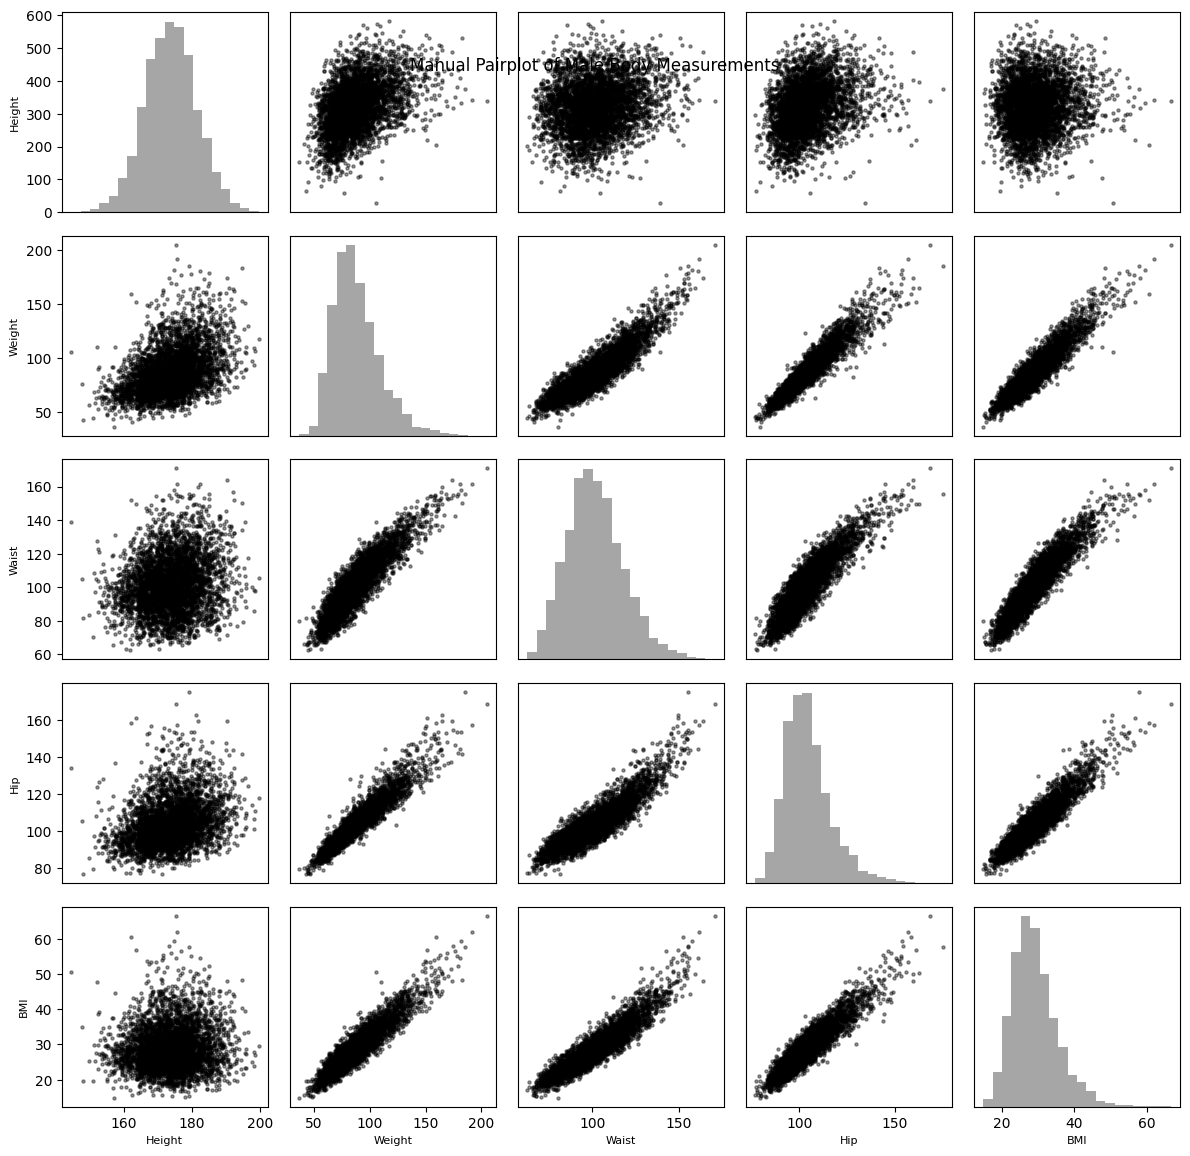

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the required features: height, weight, waist, hip, BMI
data = np.column_stack((male[:, 1], male[:, 0], male[:, 6], male[:, 5], male[:, 7]))
labels = ["Height", "Weight", "Waist", "Hip", "BMI"]
n = len(labels)

plt.figure(figsize=(12, 12))

# Loop over rows and columns to create scatter plots
for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i * n + j + 1)
        if i == j:
            # Plot histogram on the diagonal
            plt.hist(data[:, i], bins=20, color='gray', alpha=0.7)
        else:
            # Plot scatter elsewhere
            plt.scatter(data[:, j], data[:, i], s=5, color='black', alpha=0.4)

        # Set axis labels
        if i == n - 1:
            plt.xlabel(labels[j], fontsize=8)
        else:
            plt.xticks([])

        if j == 0:
            plt.ylabel(labels[i], fontsize=8)
        else:
            plt.yticks([])

plt.suptitle("Manual Pairplot of Male Body Measurements", y=0.92)
plt.tight_layout()
plt.show()


### Step 8: Pearson and Spearman Correlation Heatmaps

In this task, we calculate the correlation coefficients between five selected male features:

- Height
- Weight
- Waist Circumference
- Hip Circumference
- BMI

We compute two types of correlation:

- **Pearson correlation**: Measures linear relationships between variables.
- **Spearman correlation**: Measures monotonic relationships based on rank order.

Both correlation matrices are visualized as annotated heatmaps using Seaborn. This helps us identify strong associations or weak/no relationships between features.

The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation.


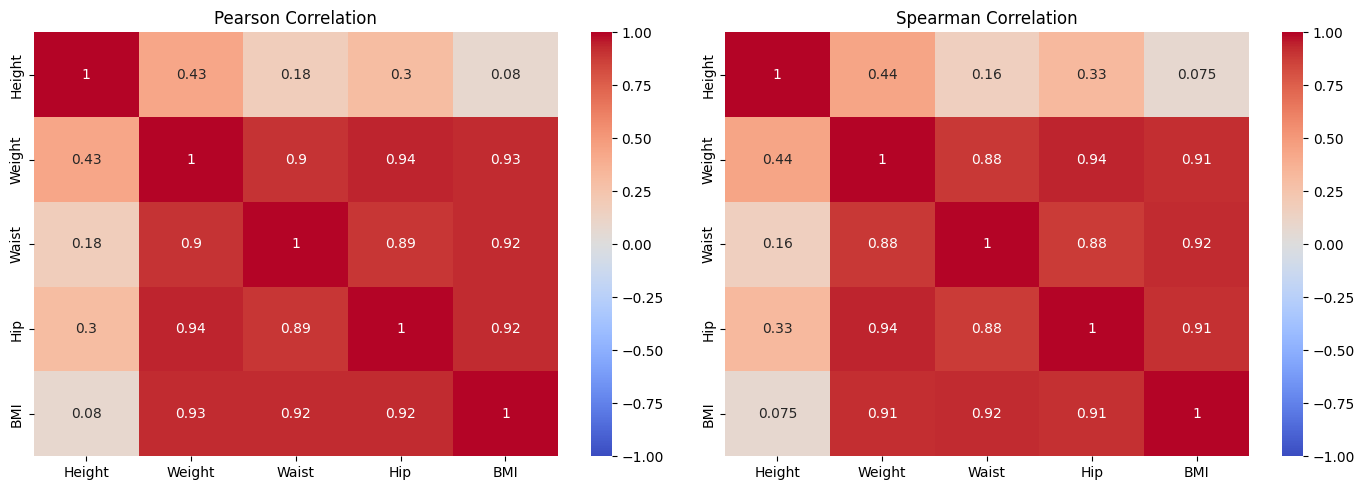

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Extract relevant columns: [Height, Weight, Waist, Hip, BMI]
data = np.column_stack((male[:, 1], male[:, 0], male[:, 6], male[:, 5], male[:, 7]))
labels = ["Height", "Weight", "Waist", "Hip", "BMI"]

# Compute Pearson correlation matrix
pearson_corr = np.corrcoef(data.T)

# Compute Spearman correlation matrix
spearman_corr, _ = spearmanr(data)

# Plot heatmaps
plt.figure(figsize=(14, 5))

# Pearson heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation")

# Spearman heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation")

plt.tight_layout()
plt.show()


### Step 9: Interpretation of Correlation Results

The correlation heatmaps for male body measurements give us insight into how different physical attributes are related.

#### 🔹 Key Observations:

- **Weight, Waist, Hip, and BMI** are all **very strongly positively correlated** (correlation values above 0.9 in both Pearson and Spearman). This means:
  - Heavier individuals tend to have larger waist and hip circumferences and higher BMI.
  - These relationships are both **linear (Pearson)** and **monotonic (Spearman)**.

- **Height** has a **weak correlation** with BMI (~0.08), and only moderate correlation with weight (~0.43).
  - This makes sense because BMI adjusts for height, so tall people don’t automatically have higher BMI.

- The **Pearson** and **Spearman** values are almost identical, which suggests that:
  - The relationships are **strong and consistent**.
  - The variables increase together in both value and rank — **smooth, not erratic**.



### Step 10 (Part 1): Standardization of Male Dataset (Z-Scores)

In this step, we standardize each of the 8 columns in the male dataset using **z-score normalization**.

A z-score transforms each value based on how far it is from the column mean, measured in standard deviations. The formula is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:  
- $x$ is the original value  
- $\mu$ is the column mean  
- $\sigma$ is the column standard deviation

The resulting matrix, called `zmale`, has columns with a mean of 0 and a standard deviation of 1. This allows all features to be compared on


In [13]:
import numpy as np

# Calculate mean and std for each column
means = np.mean(male, axis=0)
stds = np.std(male, axis=0)

# Compute z-scores: (value - mean) / std
zmale = (male - means) / stds

# Display first 5 rows to confirm
print("First 5 rows of zmale dataset:\n", zmale[:5])




First 5 rows of zmale dataset:
 [[ 0.48720705  1.10591976  1.14339753 -0.38613936  0.80788803  0.30342312
   1.12527144  0.09297688]
 [-0.65664058  1.35391391  0.77389142 -0.10615688 -0.86397174 -0.81857635
  -0.90632075 -1.14750022]
 [ 0.71597658  1.49748947  3.19620928  0.82711806 -0.48780329  0.27066401
   0.47225967  0.16743719]
 [-0.11039498 -0.78666715  0.11699166 -0.91499516 -1.1147507   0.15600713
   0.3936564   0.2213021 ]
 [ 0.51521965  1.01455349  0.48649777 -0.44835769  0.3481266   1.28619637
   0.31505313  0.15793162]]


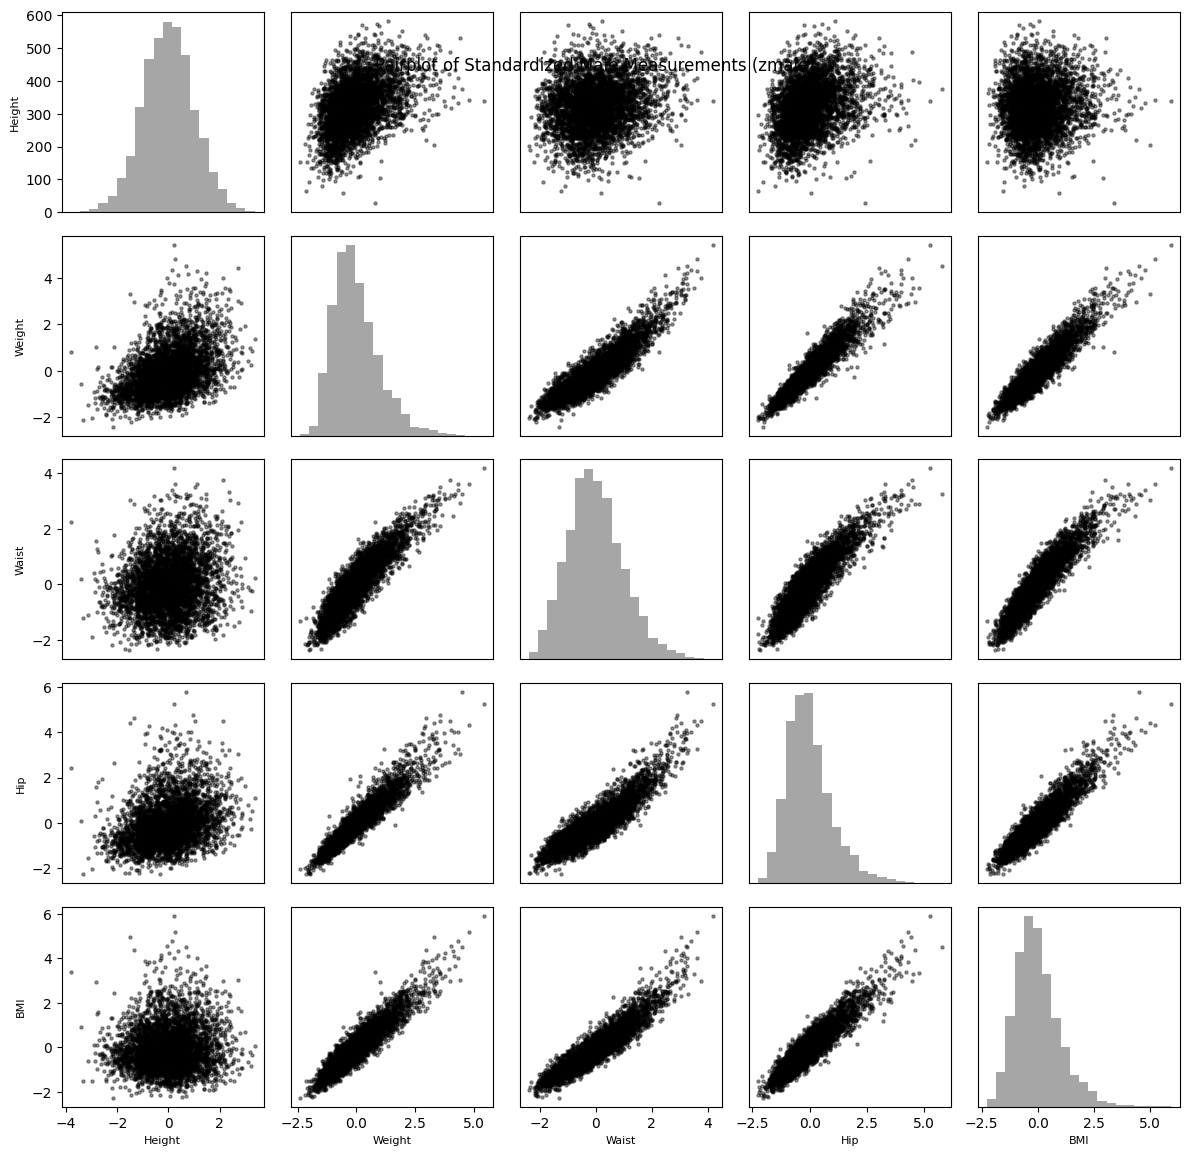

In [14]:
import matplotlib.pyplot as plt

# Select columns from zmale: Height, Weight, Waist, Hip, BMI
zdata = zmale[:, [1, 0, 6, 5, 7]]
labels = ["Height", "Weight", "Waist", "Hip", "BMI"]
n = len(labels)

plt.figure(figsize=(12, 12))

for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i * n + j + 1)
        if i == j:
            plt.hist(zdata[:, i], bins=20, color='gray', alpha=0.7)
        else:
            plt.scatter(zdata[:, j], zdata[:, i], s=5, color='black', alpha=0.4)

        if i == n - 1:
            plt.xlabel(labels[j], fontsize=8)
        else:
            plt.xticks([])

        if j == 0:
            plt.ylabel(labels[i], fontsize=8)
        else:
            plt.yticks([])

plt.suptitle("Pairplot of Standardized Male Measurements (zmale)", y=0.92)
plt.tight_layout()
plt.show()


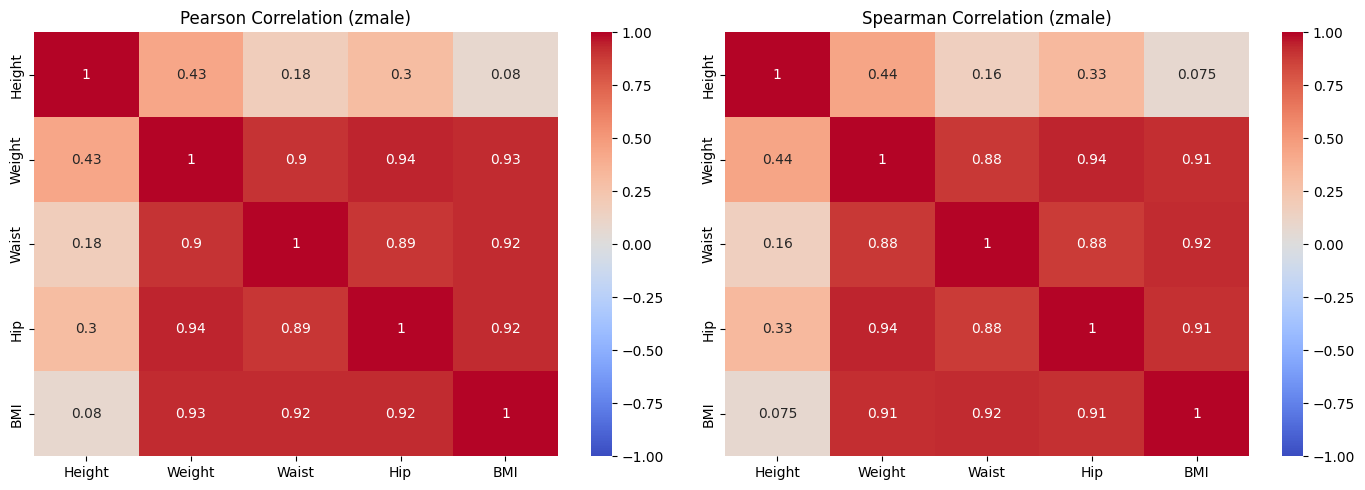

In [15]:
from scipy.stats import spearmanr
import seaborn as sns

# Pearson and Spearman correlation on zmale
pearson_corr_z = np.corrcoef(zdata.T)
spearman_corr_z, _ = spearmanr(zdata)

# Plot heatmaps
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_z, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation (zmale)")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_z, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation (zmale)")

plt.tight_layout()
plt.show()


### Step 10 (Part 3): Interpretation of Analysis on Standardized Data

After standardizing the male dataset (zmale), we repeated the pairplot and correlation heatmap analyses.

#### 🔹 Pairplot Observations:
- The shapes and patterns in the scatterplots remained the same.
- The values now range around 0 (mean) and typically fall within -3 to +3.
- This makes it easier to visually detect outliers or unusually scaled points across variables.

#### 🔹 Correlation Heatmaps:
- The **Pearson** and **Spearman** correlation values are **identical** to those from the unstandardized data.
- This confirms that **correlation is not affected by scale** — standardization changes the units but not the relationships.
- Strong positive correlations still exist among Weight, Waist, Hip, and BMI.

####  Final Insight:
Standardization helps to bring all variables onto the same scale without changing their relationships. It’s especially useful when comparing variables with different units or preparing data for clustering, PCA, or distance-based algorithms.
